In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


data=pd.io.stata.read_stata("E:/summer_intern/CAP_alg/data/fertil2.dta")
data = data.fillna(data.mode().iloc[0])
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)


# Save the train_data and test_data to CSV files
train_data.to_csv("E:/summer_intern/CAP_alg/data/train_data.csv")
test_data.to_csv("E:/summer_intern/CAP_alg/data/test_data.csv")
train_data['y'] = train_data['ceb']+train_data['children']
test_data['y'] = test_data['ceb']+test_data['children']
train_data=train_data.drop(columns=['ceb', 'children'])
test_data=test_data.drop(columns=['ceb', 'children'])
# Create y column
import numpy as np
# Merge columns 1 to 8 and 10 into a single column 'x'
#import pandas as pd
train_data['x'] = train_data.iloc[:, :9].sum(axis=1)
test_data['x'] = test_data.iloc[:, :9].sum(axis=1)
# Drop the original columns 1 to 8 and 10
train_data = train_data.drop(train_data.iloc[:, :9], axis=1)
test_data = test_data.drop(test_data.iloc[:, :9], axis=1)

train_data['z'] = train_data.iloc[:, :5].sum(axis=1)
test_data['z'] = test_data.iloc[:, :5].sum(axis=1)
# Drop the original columns 1 to 8 and 10
train_data = train_data.drop(train_data.iloc[:, :5], axis=1)
test_data = test_data.drop(test_data.iloc[:, :5], axis=1)

train_data['a'] = train_data.iloc[:, :5].sum(axis=1)
test_data['a'] = test_data.iloc[:, :5].sum(axis=1)
# Drop the original columns 1 to 8 and 10
train_data = train_data.drop(train_data.iloc[:, :5], axis=1)
test_data = test_data.drop(test_data.iloc[:, :5], axis=1)

train_data['u'] = train_data.iloc[:, :6].sum(axis=1)
test_data['u'] = test_data.iloc[:, :6].sum(axis=1)
# Drop the original columns 1 to 8 and 10
train_data = train_data.drop(train_data.iloc[:, :6], axis=1)
test_data = test_data.drop(test_data.iloc[:, :6], axis=1)

print(train_data)
print(test_data)

         y      x      z       a    u
2378   0.0  126.0  109.0   326.0  1.0
376    4.0  124.0  102.0   588.0  2.0
1948   6.0  128.0  105.0  1537.0  2.0
3893   3.0  118.0  116.0   494.0  3.0
568    8.0  117.0  116.0  1096.0  3.0
...    ...    ...    ...     ...  ...
3444   4.0  118.0  110.0   739.0  3.0
466   15.0  111.0   97.0  1686.0  3.0
3092   2.0  125.0  108.0   375.0  1.0
3772  14.0  114.0   78.0  1940.0  3.0
860   12.0  128.0   79.0  1973.0  3.0

[3924 rows x 5 columns]
         y      x      z       a    u
179    4.0  126.0  100.0   505.0  1.0
3166   2.0  119.0  112.0   637.0  3.0
2740  10.0  119.0   96.0  1092.0  3.0
2191   6.0  121.0  109.0   628.0  2.0
1578   6.0  120.0  109.0   540.0  1.0
...    ...    ...    ...     ...  ...
596    4.0  108.0  123.0   634.0  4.0
911    0.0  124.0  108.0   305.0  1.0
4034  11.0  116.0  108.0  1038.0  3.0
1626   8.0  113.0   89.0  1099.0  2.0
2099  14.0  121.0  108.0  2310.0  2.0

[437 rows x 5 columns]


In [5]:
import sys
sys.path.insert(0, 'E:/summer_intern/CAP_alg/src')
import CAP_algorithm
from CAP_algorithm import CAP_policy_learning_IV
#print(train_data)
#print(train_data['x'].shape[0], train_data['a'].shape[0])
from contextualbandits.online import BootstrappedUCB, BootstrappedTS, LinUCB
from sklearn.linear_model import LogisticRegression
import numpy as np
#print(dataset)

#print(context_dataset.shape[0])
#policy.fit(X=context_dataset,a=np.array(train_data['a']),r=np.array(train_data['y']))
policy=CAP_policy_learning_IV(train_data)
#policy都做的builtin，没有做接口



successfully generated hypothesis dataset
merged_confidence_set [ 0.25  0.5   2.5   3.5   4.5   6.5   8.5  12.5 ]
successfully generated confidence set
successule minimax estimator


To use CAP method based on CCB-IV model, we exploit the FERTIL2 dataset

About FERTIL2 dataset:
The goal of this dataset is to study the impact of women's education for more than seven years (or exactly seven) years on the number of children in a household. It contains several observational confounding factors, such as age, television ownership, urban residence, etc. The instrumental variable is a binary indicator that indicates whether a woman was born in the first half of the year. This dataset is often used for the study of tool variables.


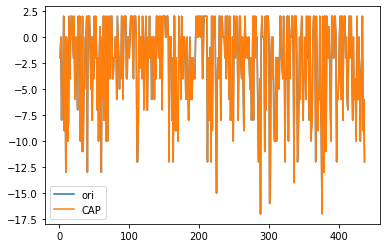

In [9]:
## Test with baselines and regret analysis:
from contextualbandits.online import LinTS
import numpy as np
policy_ori=LinTS(10)
context_dataset = np.vstack((train_data['x'], train_data['z'])).T
policy_ori.fit(X=context_dataset,a=np.array(train_data['a']),r=np.array(train_data['y']))
#policy_ori.fit(np.array(train_data['x']), np.array(train_data['a']),np.array(train_data['y']))
from UC_DTR import uc_dtr_simulation
## Draw the regret diagram and analyze it
from contextualbandits.evaluation import evaluateRejectionSampling
ori_list=[]
for index,row in test_data.iterrows():
    context_dataset_t = np.vstack((row['x'], row['z'])).T
    action=policy_ori.predict(context_dataset_t)
    reward=row['y']
    optimal_action = np.argmax(test_data['y'])
    optimal_reward = test_data['y'][optimal_action]
    regret = optimal_reward - reward
    ori_list.append(regret)
import matplotlib.pyplot as plt

## Try to plot CAP_alg regret graph:
CAP_list=[]
for index,row in test_data.iterrows():
    context_dataset_t = np.vstack((row['x'], row['z'])).T
    action=policy.predict(context_dataset_t)
    reward=row['y']
    optimal_action = np.argmax(test_data['y'])
    optimal_reward = test_data['y'][optimal_action]
    regret = optimal_reward - reward
    CAP_list.append(regret)

x_list=list(range(1,len(CAP_list)+1))
#plt.plot(x_list,ori_list,label='ori')
#plt.plot(x_list,CAP_list,label='CAP')
plt.legend()
plt.show()

In [7]:
#Here we implement CCB_PV simulation based on the coding
